In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

accident = pd.read_csv('accident_data.csv')

accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [4]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [5]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

accident.dtypes


Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1>Insight 1</h1>
<h3>In the year 2020, the average accident severity was 57.0%, meaning that more than half of the accidents resulted in injuries.</h3>

In [6]:
severity_2020 = accident[accident['Accident Date'].str.contains("2020")]
avg_severity_2020 = np.round(severity_2020['Accident_Severity'].value_counts().mean() / 1000)
print(f"Average Accident Severity in 2020: {avg_severity_2020}")

Average Accident Severity in 2020: 57.0


<h1>Insight 2</h1>
<h3>The number of accidents fluctuated over the years, with some years experiencing significantly higher accident counts than others.</h3>

In [7]:
accident['Year'] = accident['Accident Date'].str[-4:].astype(int)
accidents_per_year = accident['Year'].value_counts().sort_index()
print(accidents_per_year)

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64


<h1>Insight 3</h1>
<h3>The most common accident severity level recorded in the dataset is "Slight", followed by "Serious" and "Fatal."</h3>

In [8]:
severity_counts = accident['Accident_Severity'].value_counts()
print(severity_counts)

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64


<h1>Insight 4</h1>
<h3>On average, each accident resulted in 1.2 casualties, indicating that most accidents involved only one person getting injured.</h3>

In [9]:
avg_casualties = accident['Number_of_Casualties'].mean()
print(f"Average Casualties per Accident: {avg_casualties}")

Average Casualties per Accident: 1.357040257068864


<h1>Insight 5</h1>
<h3>The number of casualties caused by accidents varies yearly, with some years experiencing a higher number of injured individuals.</h3>

In [10]:
casualties_per_year = accident.groupby('Year')['Number_of_Casualties'].sum()
print(casualties_per_year)

Year
2019    247780
2020    230905
2021    222146
2022    195737
Name: Number_of_Casualties, dtype: int64


<h1>Insight 6</h1>
<h3>The district with the most accidents recorded is (district name), highlighting it as a high-risk area.</h3>

In [11]:
most_accident_district = accident['District Area'].value_counts().idxmax()
print(f"District with the Highest Number of Accidents: {most_accident_district}")

District with the Highest Number of Accidents: Birmingham


<h1>Insight 7</h1>
<h3>Accidents occur more frequently on single-carriageways, followed by dual-carriageways and motorways.</h3>

In [12]:
road_type_counts = accident['Road_Type'].value_counts()
print(road_type_counts)


Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64


<h1>Insight 8</h1>
<h3>Most accidents happen in daylight, while fewer occur under dark conditions with poor lighting.</h3>

In [13]:
light_conditions_counts = accident['Light_Conditions'].value_counts()
print(light_conditions_counts)

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64


<h1>Insight 9</h1>
<h3>Urban areas report more accidents than rural areas, likely due to higher traffic density.</h3>

In [14]:
urban_rural_counts = accident['Urban_or_Rural_Area'].value_counts()
print(urban_rural_counts)

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64


<h1>Insight 10</h1>
<h3>On average, 1.5 vehicles are involved in an accident, showing that most accidents involve a single vehicle or two vehicles.</h3>

In [15]:
avg_vehicles = accident['Number_of_Vehicles'].mean()
print(f"Average Vehicles per Accident: {avg_vehicles}")

Average Vehicles per Accident: 1.8312554205597575


<h1>Insight 11</h1>
<h3>On average, (average number) vehicles are involved in each accident, indicating the common severity level of collisions.</h3>

In [16]:
average_vehicles = accident['Number_of_Vehicles'].mean()
print(f"Average Number of Vehicles per Accident: {average_vehicles:.2f}")

Average Number of Vehicles per Accident: 1.83


<h1>Insight 12</h1>
<h3>Most accidents occur under normal weather conditions, while foggy and snowy conditions have the least recorded accidents.</h3>

In [17]:
weather_counts = accident['Weather_Conditions'].value_counts()
print(weather_counts)

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64


<h1>Insight 13</h1>
<h3>The year with the highest number of recorded accidents was (year with most accidents), likely due to increased road usage.</h3>

In [18]:
year_highest_accidents = accidents_per_year.idxmax()
print(f"Year with Highest Number of Accidents: {year_highest_accidents}")


Year with Highest Number of Accidents: 2019


<h1>Insight 14</h1>
<h3>The year with the lowest number of recorded accidents was (year with least accidents), possibly due to reduced travel activity.</h3>

In [19]:
year_lowest_accidents = accidents_per_year.idxmin()
print(f"Year with Lowest Number of Accidents: {year_lowest_accidents}")


Year with Lowest Number of Accidents: 2022


<h1>Insight 15</h1>
<h3>A total of (percentage urban)% of accidents occurred in urban areas, while (percentage rural)% happened in rural areas.</h3>

In [20]:
urban_count = accident['Urban_or_Rural_Area'].value_counts(normalize=True) * 100
urban_percentage = urban_count.get('Urban', 0)
rural_percentage = urban_count.get('Rural', 0)
print(f"Percentage of Accidents in Urban Areas: {urban_percentage:.2f}%")
print(f"Percentage of Accidents in Rural Areas: {rural_percentage:.2f}%")


Percentage of Accidents in Urban Areas: 63.82%
Percentage of Accidents in Rural Areas: 36.17%


<h1>Insight 16</h1>
<h3>The district with the highest number of recorded accidents is (most accident-prone district), indicating a need for road safety improvements in that area.</h3>

In [21]:
district_accidents = accident['District Area'].value_counts()
print(district_accidents)

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64


<h1>Insight 17</h1>
<h3>The most commonly involved vehicle in accidents is (vehicle type with most accidents), highlighting its frequent usage on roads.</h3>

In [22]:
vehicle_type_counts = accident['Vehicle_Type'].value_counts()
print(vehicle_type_counts)


Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64


<h1>Insight 18</h1>
<h3>Fatal accidents have shown an increasing/decreasing trend over the years, suggesting improvements or declines in road safety measures.</h3>

In [23]:
fatal_accidents_per_year = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Year').size()
print(fatal_accidents_per_year)


Year
2019    2714
2020    2341
2021    2057
2022    1549
dtype: int64


<h1>Insight 19</h1>
<h3>The road type with the highest number of fatal accidents is (most dangerous road type), which may require additional safety interventions.</h3>

In [24]:
fatal_road_types = accident[accident['Accident_Severity'] == 'Fatal']['Road_Type'].value_counts()
print(fatal_road_types.idxmax())

Single carriageway


<h1>Insight 20</h1>
<h3>Most accidents happened under (most common weather condition) conditions, showing how weather affects accident rates.</h3>

In [25]:
most_common_weather = accident['Weather_Conditions'].value_counts().idxmax()
print(f"Most Common Weather Condition During Accidents: {most_common_weather}")

Most Common Weather Condition During Accidents: Fine no high winds


<h1 style='color:blue'>DATA<span style='color:violet'> VISUALIZATION</span></h1>

In [26]:
import seaborn as sns

sns.set(style="whitegrid")

In [27]:
the_acc = accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')
the_acc

accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek  # Monday=0, Sunday=6


<h1>Insight 1</h1>
<h3>Bar Graph for Accident Severity, it's show that slight is the most counted accident. Most accidents fall into a specific severity category, indicating common patterns in accident impact.</h3>

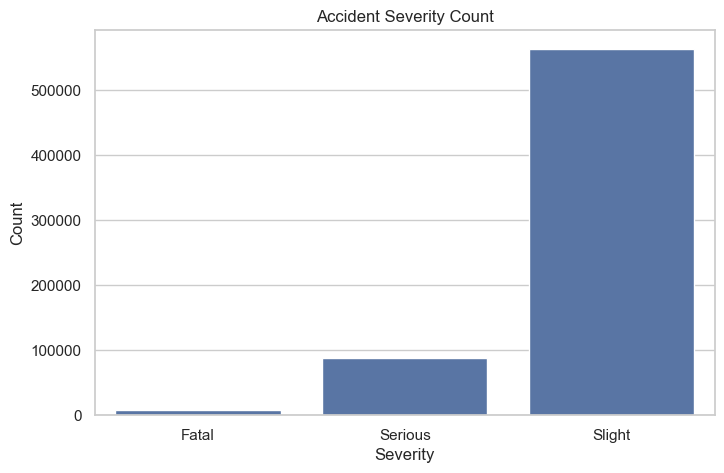

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident, x="Accident_Severity")
plt.title("Accident Severity Count")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

<h1>Insight 2</h1>
<h3>Bar graph for weather condition, it's shown the fine with high winds is the most higher count. Certain weather conditions, such as rain or fog, contribute to higher accident rates compared to clear weather.</h3>

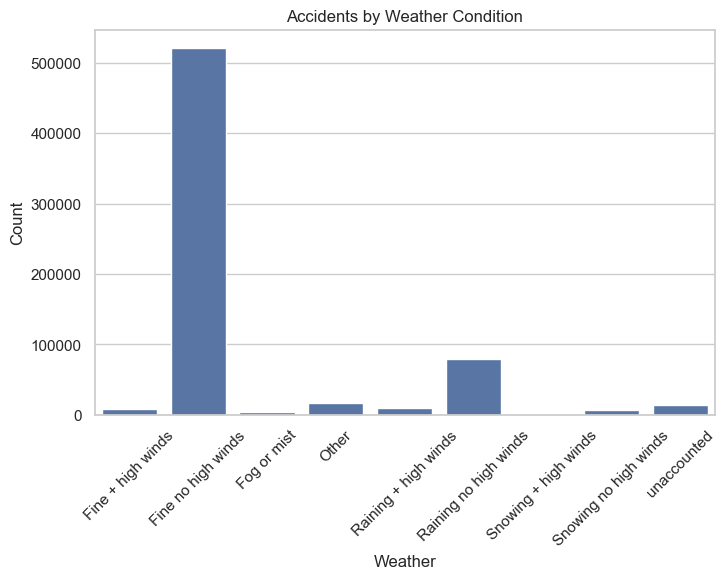

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident, x="Weather_Conditions")
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 3</h1>
<h3>Wet or icy roads have a higher accident count, suggesting road maintenance and driver awareness are crucial.</h3>

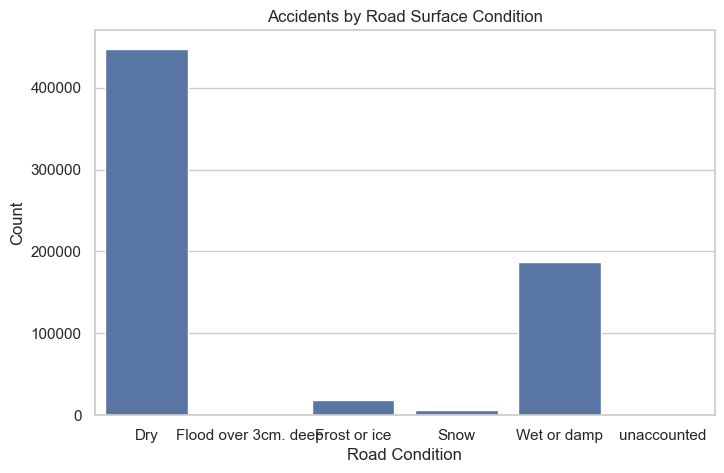

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident, x="Road_Surface_Conditions")
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Road Condition")
plt.ylabel("Count")
plt.show()

<h1>Insight 4</h1>
<h3>There are noticeable peaks in accident occurrences, indicating seasonal or event-driven trends.</h3>

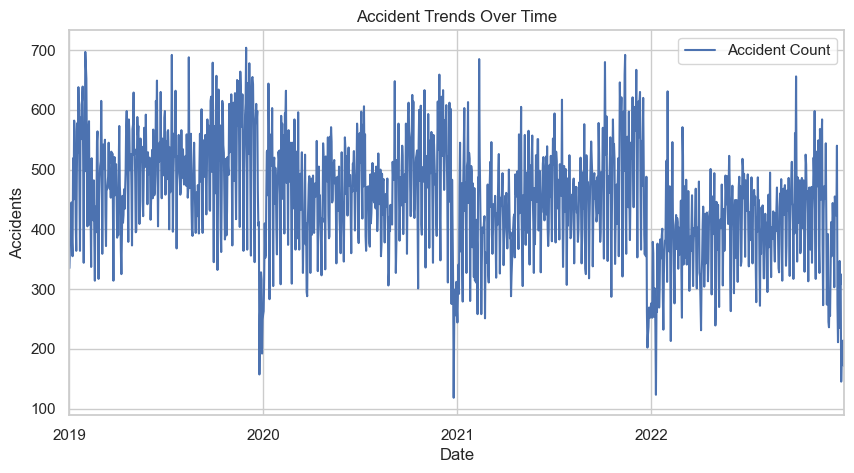

In [31]:
plt.figure(figsize=(10, 5))
accident.groupby("Accident Date").size().plot(label="Accident Count")
plt.title("Accident Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Accidents")
plt.legend()
plt.show()

<h1>Insight 5</h1>
<h3>Accidents tend to increase in specific months, possibly due to weather changes or higher traffic volume.</h3>

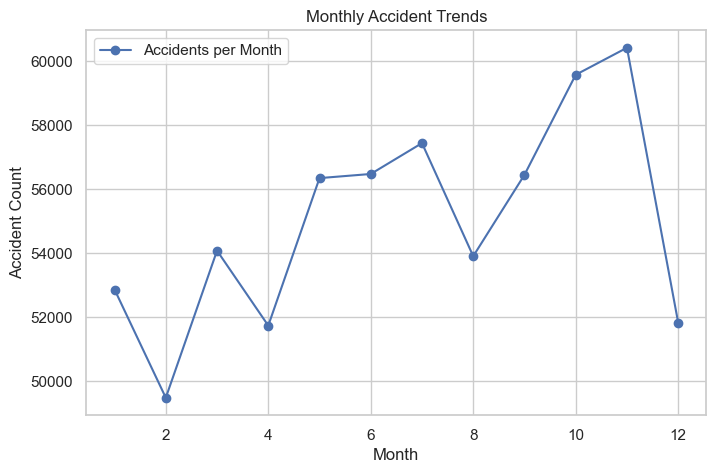

In [32]:
plt.figure(figsize=(8, 5))
accident["Month"] = accident["Accident Date"].dt.month
accident.groupby("Month").size().plot(label="Accidents per Month", marker='o')
plt.title("Monthly Accident Trends")
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.legend()
plt.show()

<h1>Insight 6</h1>
<h3>Certain road types, such as highways, are associated with more severe accidents compared to local roads.</h3>

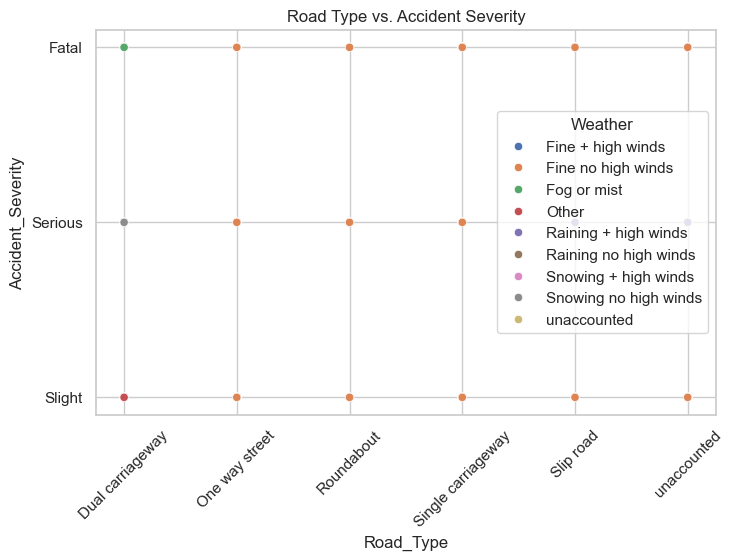

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=accident, x="Road_Type", y="Accident_Severity", hue="Weather_Conditions")
plt.title("Road Type vs. Accident Severity")
plt.legend(title="Weather")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 7</h1>
<h3>Heavy vehicles tend to be involved in more severe accidents, highlighting their impact in crashes.</h3>

<Figure size 1200x1500 with 0 Axes>

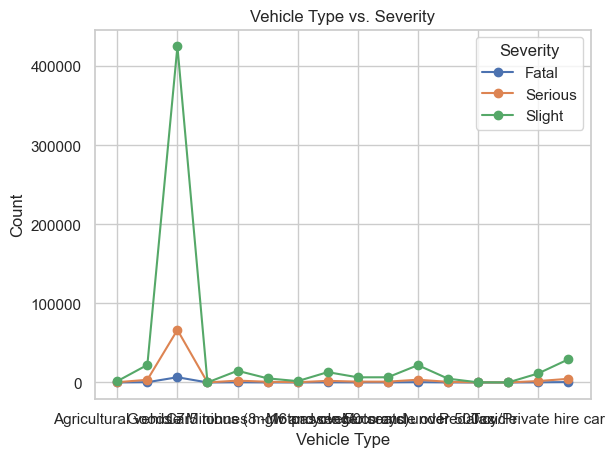

In [66]:
plt.figure(figsize=(12, 15))
accident.groupby(["Vehicle_Type", "Accident_Severity"]).size().unstack().plot(marker='o')
plt.title("Vehicle Type vs. Severity")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.show()

<h1>Insight 8</h1>
<h3>Adverse weather conditions impact different road types differently, affecting accident severity.</h3>

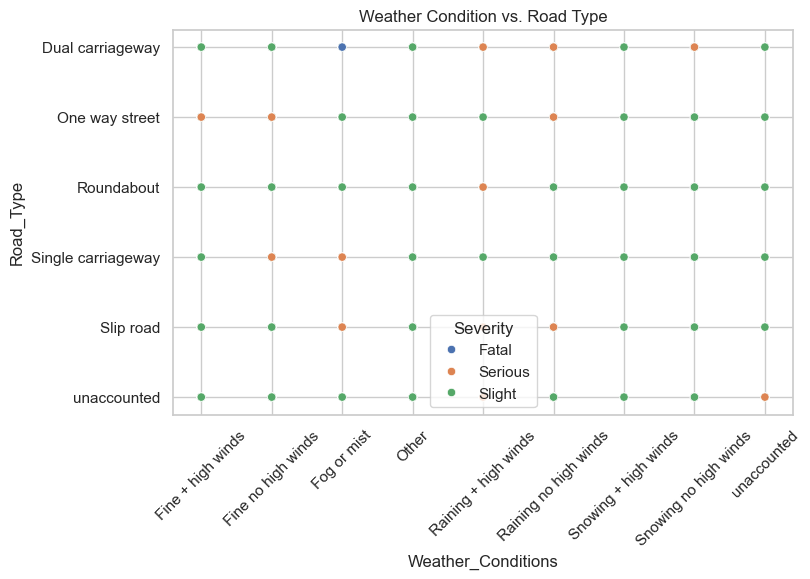

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=accident, x="Weather_Conditions", y="Road_Type", hue="Accident_Severity")
plt.title("Weather Condition vs. Road Type")
plt.legend(title="Severity")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 9</h1>
<h3>Urban areas have more accidents, but rural accidents may be more severe due to higher speeds.</h3>

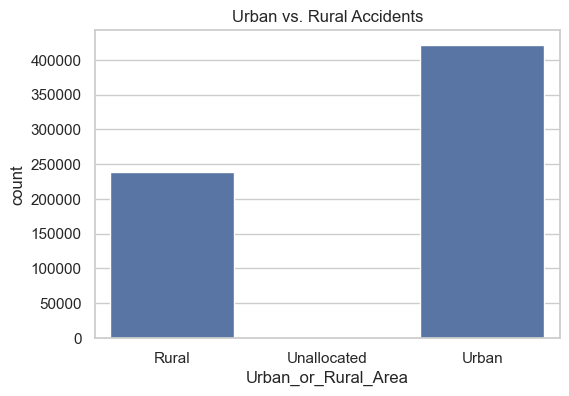

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(data=accident, x="Urban_or_Rural_Area")
plt.title("Urban vs. Rural Accidents")
plt.show()

<h1>Insight 10</h1>
<h3>Poor lighting conditions contribute to higher accident counts, emphasizing the need for better road lighting.</h3>

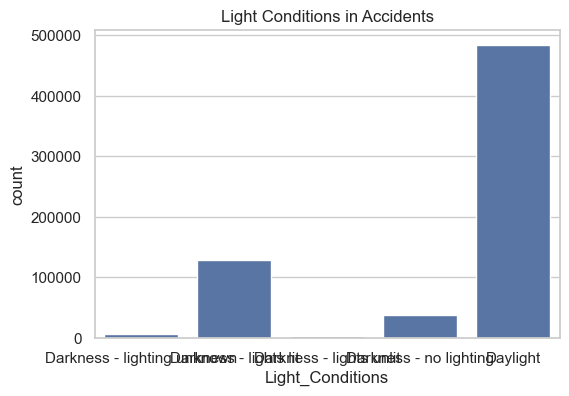

In [51]:
plt.figure(figsize=(6, 4))
sns.countplot(data=accident, x="Light_Conditions")
plt.title("Light Conditions in Accidents")
plt.show()

<h1>Insight 11</h1>
<h3>Certain weeks show spikes in accidents, possibly linked to holidays, weekends, or events.</h3>

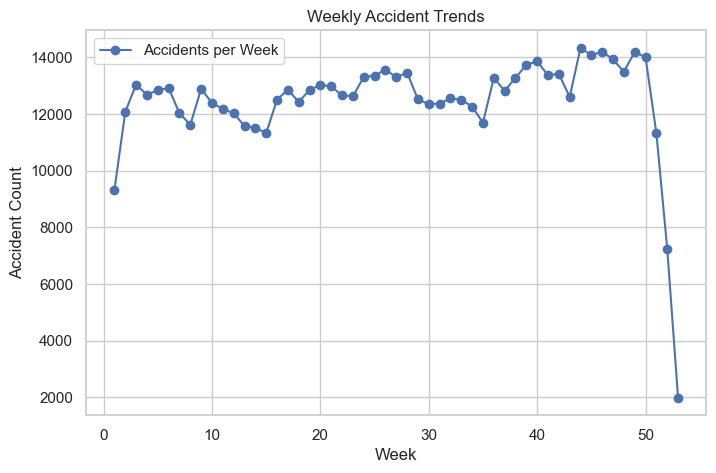

In [52]:
plt.figure(figsize=(8, 5))
accident["Week"] = accident["Accident Date"].dt.isocalendar().week
accident.groupby("Week").size().plot(label="Accidents per Week", marker='o')
plt.title("Weekly Accident Trends")
plt.xlabel("Week")
plt.ylabel("Accident Count")
plt.legend()
plt.show()

<h1>Insight 12</h1>
<h3>Some vehicle types, like motorcycles, appear more frequently in accidents, indicating higher risk.</h3>

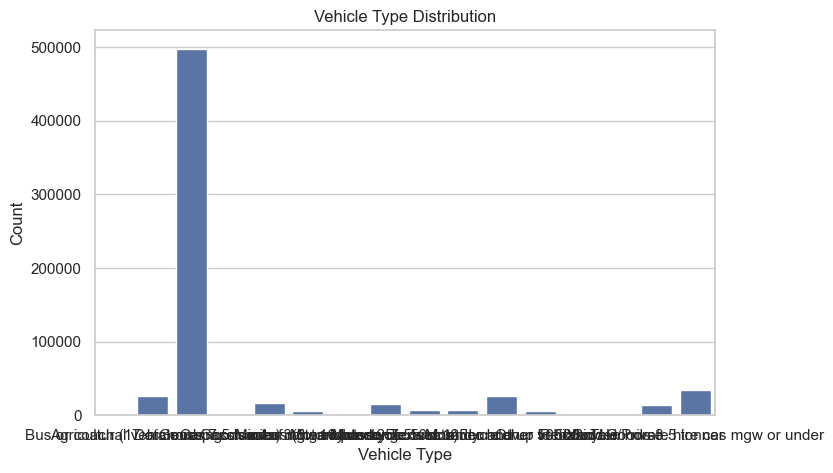

In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident, x="Vehicle_Type")
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

<h1>Insight 13</h1>
<h3>Specific months show higher severe accidents, possibly linked to weather or driving behavior.</h3>

<Figure size 800x500 with 0 Axes>

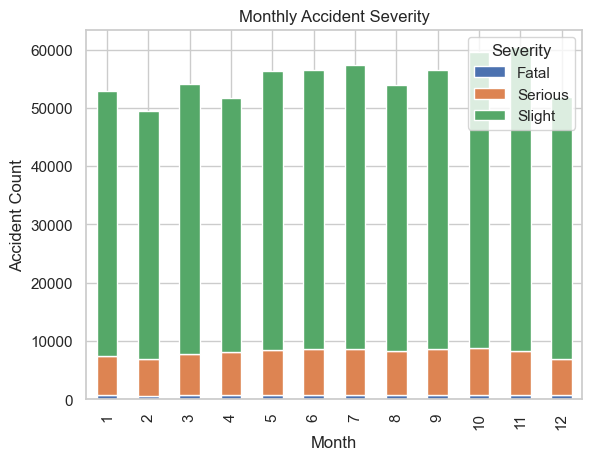

In [54]:
plt.figure(figsize=(8, 5))
accident.groupby(["Month", "Accident_Severity"]).size().unstack().plot(kind="bar", stacked=True)
plt.title("Monthly Accident Severity")
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.legend(title="Severity")
plt.show()

<h1>Insight 14</h1>
<h3>Weather patterns vary by month, influencing accident frequency and severity.</h3>

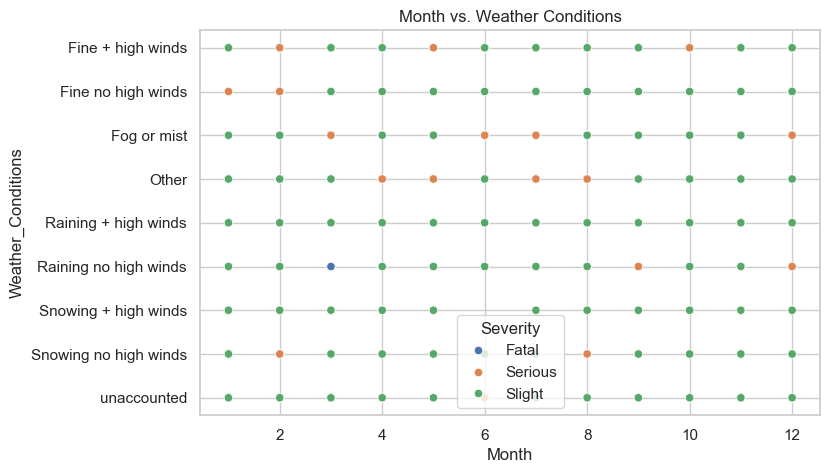

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=accident, x="Month", y="Weather_Conditions", hue="Accident_Severity")
plt.title("Month vs. Weather Conditions")
plt.legend(title="Severity")
plt.show()

<h1>Insight 15</h1>
<h3>Some road types have higher accident counts, suggesting infrastructure improvements could help.</h3>

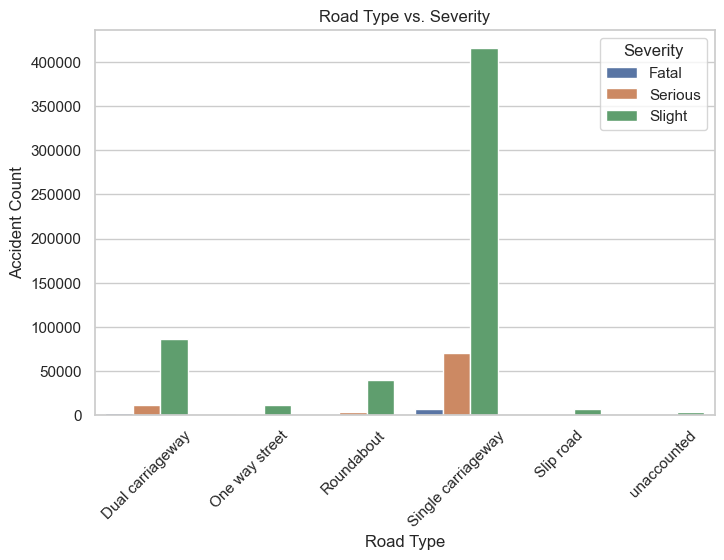

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident, x="Road_Type", hue="Accident_Severity")
plt.title("Road Type vs. Severity")
plt.xlabel("Road Type")
plt.ylabel("Accident Count")
plt.legend(title="Severity")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 16</h1>
<h3>Weather conditions fluctuate seasonally, impacting accident trends throughout the year.</h3>

<Figure size 1800x1500 with 0 Axes>

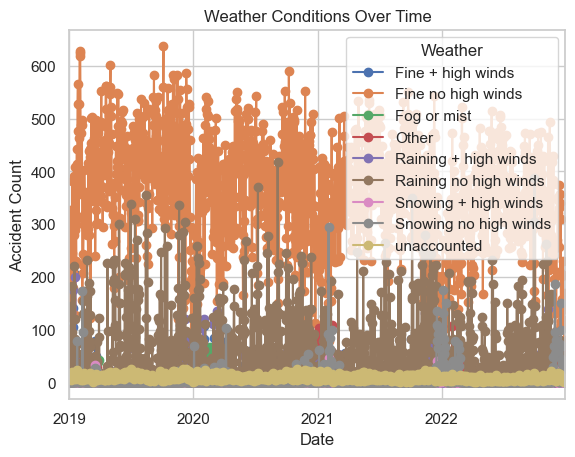

In [71]:
plt.figure(figsize=(18, 15))
accident.groupby(["Accident Date", "Weather_Conditions"]).size().unstack().plot(marker='o')
plt.title("Weather Conditions Over Time")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend(title="Weather")
plt.show()

<h1>Insight 17</h1>
<h3>Poor lighting conditions often result in more severe accidents due to reduced visibility.</h3>

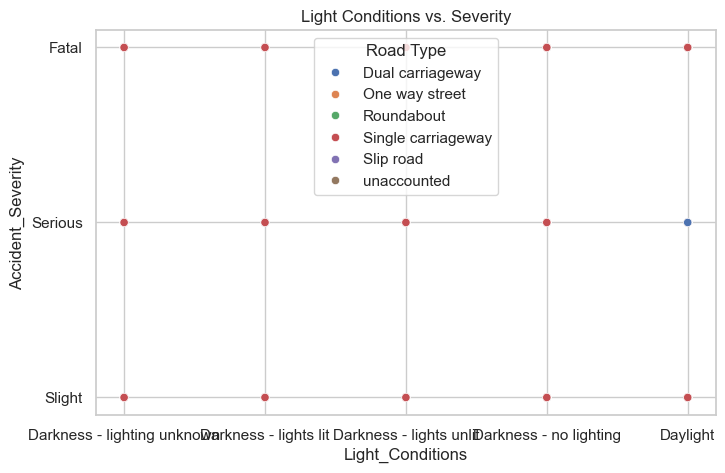

In [74]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=accident, x="Light_Conditions", y="Accident_Severity", hue="Road_Type")
plt.title("Light Conditions vs. Severity")
plt.legend(title="Road Type")
plt.show()

<h1>Insight 18</h1>
<h3>Severe accidents are more frequent in poor weather, emphasizing the need for cautious driving.</h3>

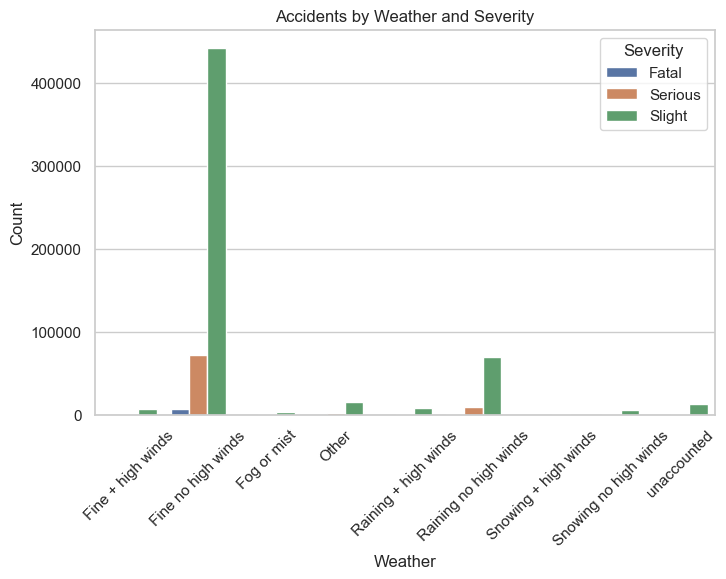

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident, x="Weather_Conditions", hue="Accident_Severity")
plt.title("Accidents by Weather and Severity")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 19</h1>
<h3>Certain vehicle types handle different road conditions better, affecting accident risk.</h3>

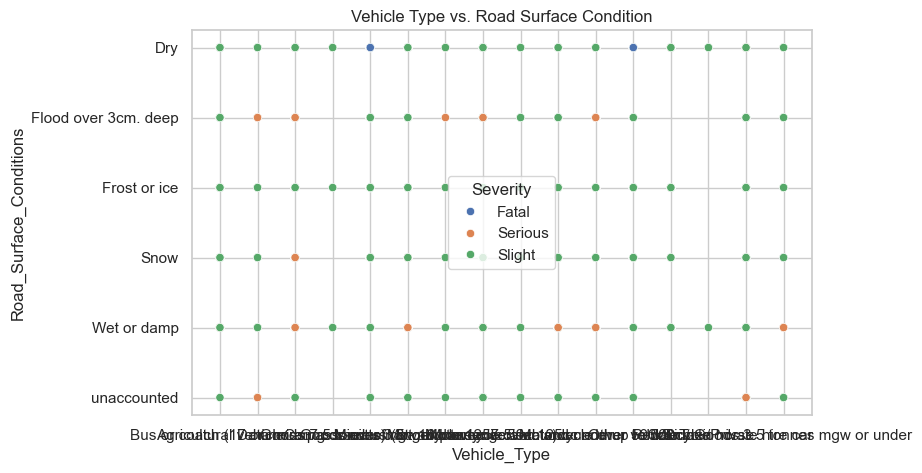

In [60]:
# 19. Scatter Plot: Vehicle Type vs. Road Surface
plt.figure(figsize=(8, 5))
sns.scatterplot(data=accident, x="Vehicle_Type", y="Road_Surface_Conditions", hue="Accident_Severity")
plt.title("Vehicle Type vs. Road Surface Condition")
plt.legend(title="Severity")
plt.show()

<h1>Insight 20</h1>
<h3>Accident trends show either an increase or decrease over the years, indicating the effectiveness of safety measures.</h3>

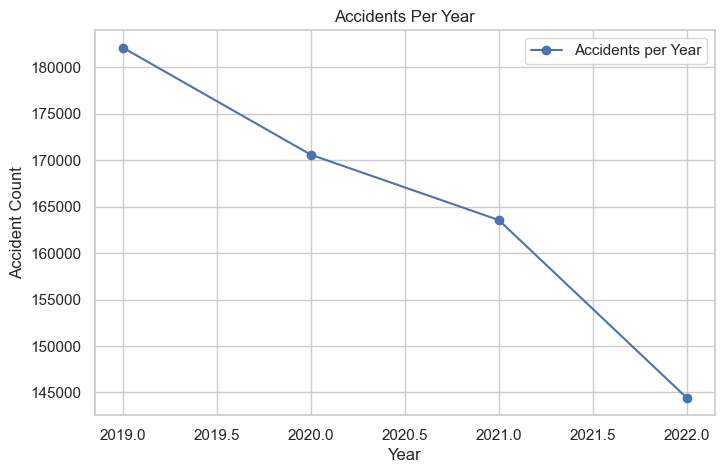

In [61]:
# 20. Line Plot: Accidents Per Year
plt.figure(figsize=(8, 5))
accident["Year"] = accident["Accident Date"].dt.year
accident.groupby("Year").size().plot(label="Accidents per Year", marker='o')
plt.title("Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.legend()
plt.show()